# Predictive analysis of Bank Marketing

#### Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### What to achieve?
The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Contains information in following format:

### Categorical Variable :

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* Default - (Yes/No)

### Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

#### Class
* deposit - (Yes/No)

1. **Importing required libraries**

In [2]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


#Classification Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing and displaying the data**

In [7]:
data = pd.read_csv("/content/banking_data.csv")
data.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


**Finding correlation between features and class for selection**

**1. Using Pairplot**

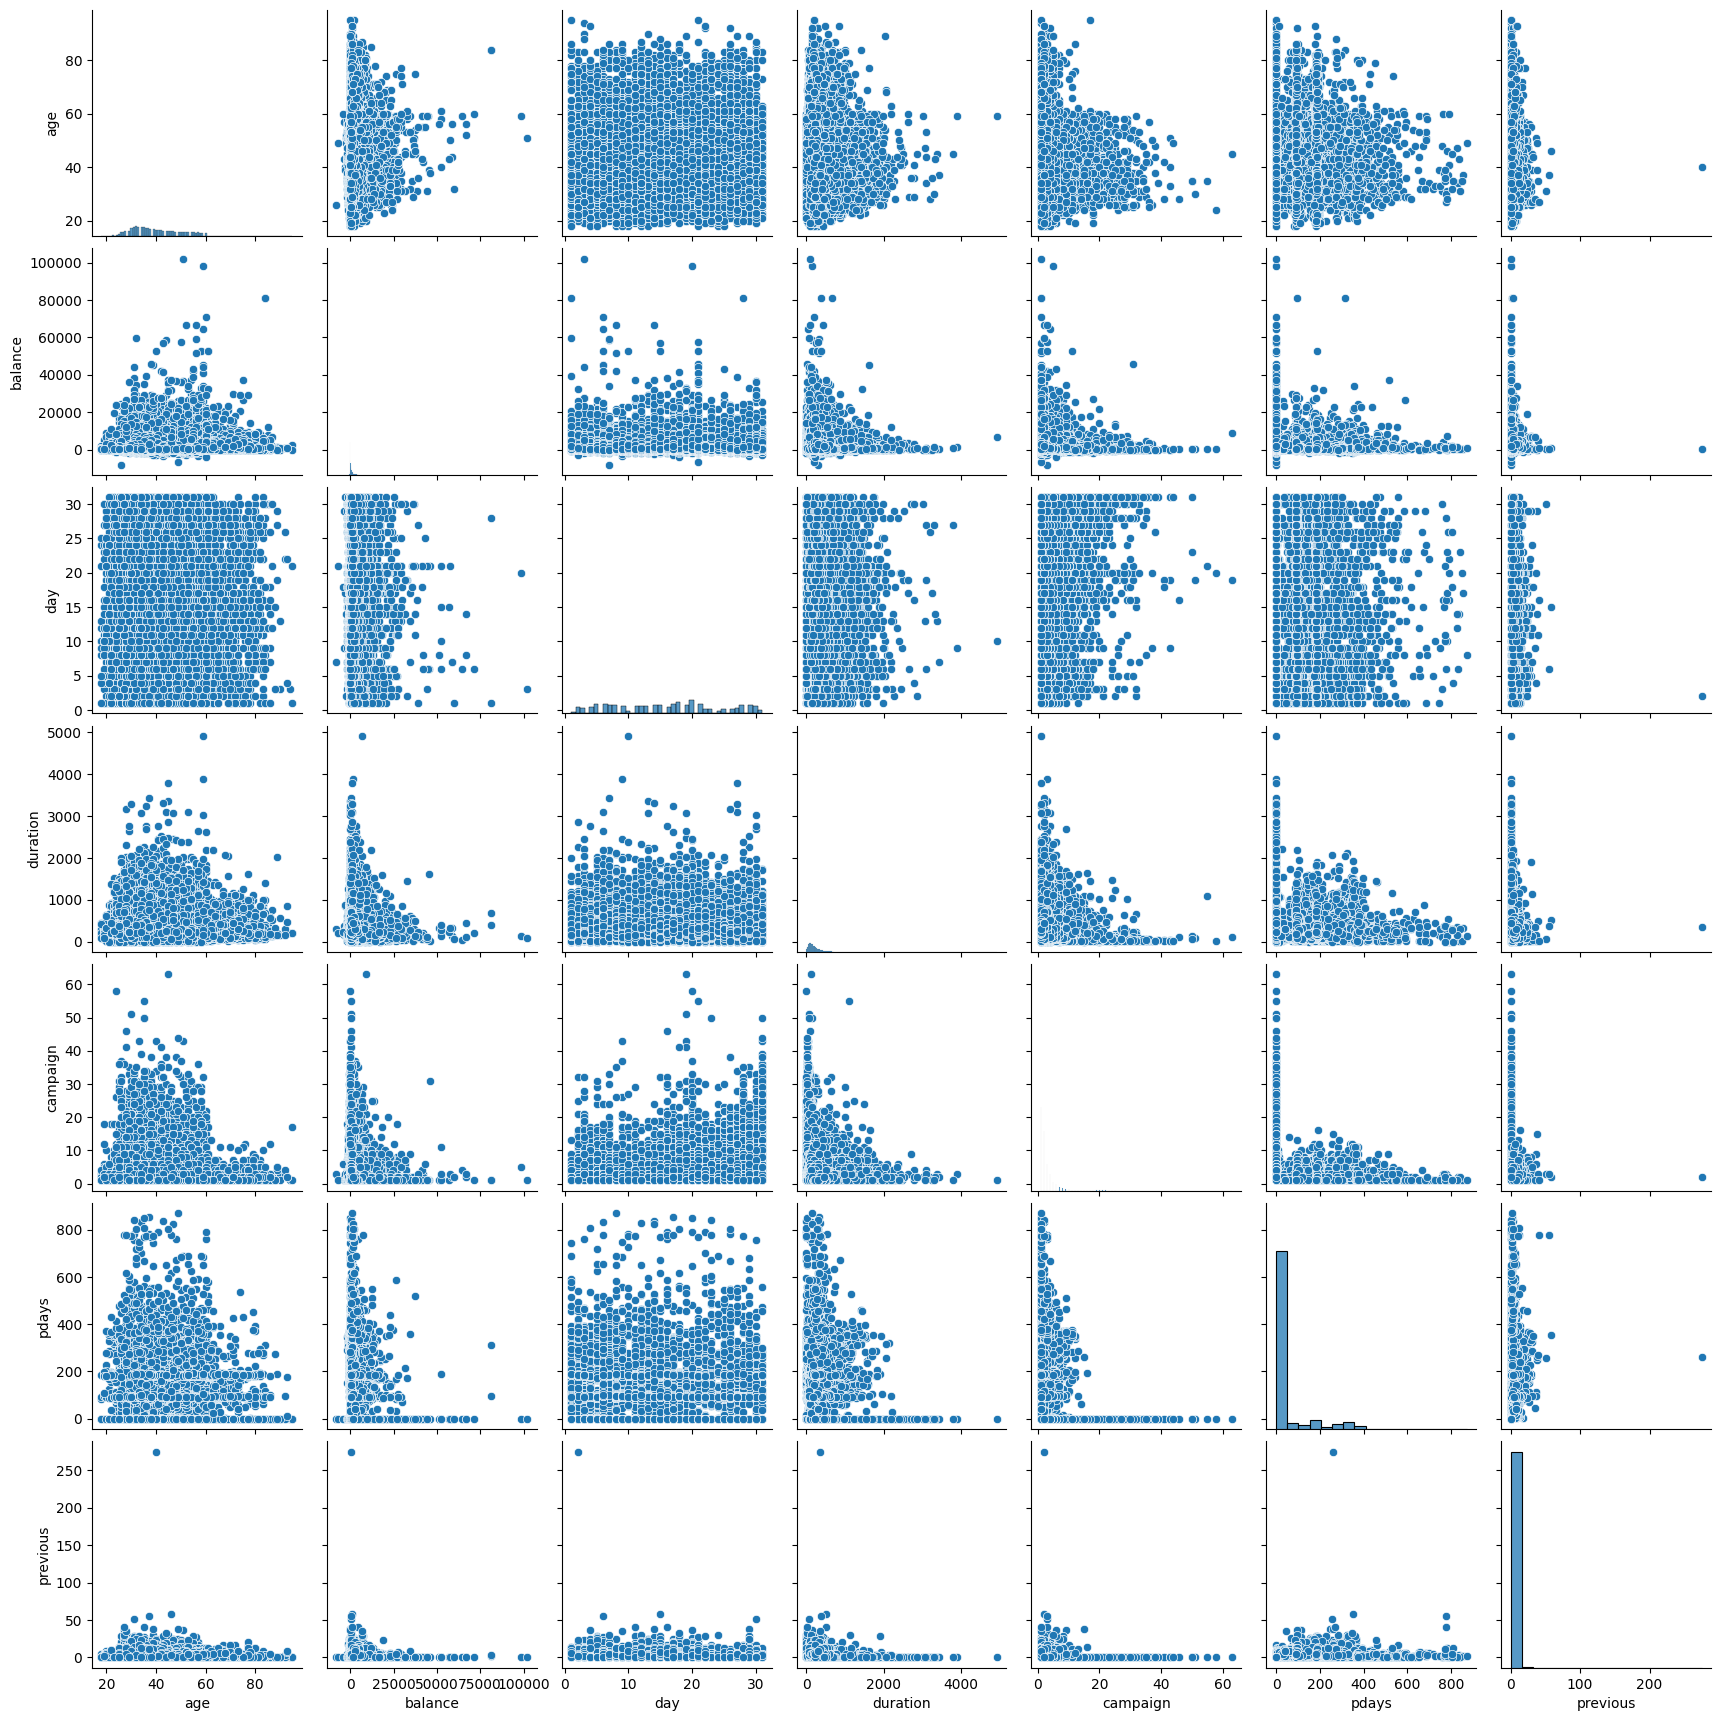

In [8]:
sns.pairplot(data)

We can observe that data here is not-symmetric. So lets find out the correlation matrix to look into details.

**2. Correlation Matrix**

In [13]:
df = data[['age','balance','day','duration'	,'campaign'	,'pdays'	,'previous'	]]
df.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097789,-0.009095,-0.004599,0.004673,-0.023647,0.001663
balance,0.097789,1.000000,0.004504,0.021565,-0.014578,0.003425,0.016693
day,-0.009095,0.004504,1.000000,-0.030204,0.162483,-0.093036,-0.051685
duration,-0.004599,0.021565,-0.030204,1.000000,-0.084569,-0.001581,0.001197
campaign,0.004673,-0.014578,0.162483,-0.084569,1.000000,-0.088651,-0.032932
pdays,-0.023647,0.003425,-0.093036,-0.001581,-0.088651,1.000000,0.454833
previous,0.001663,0.016693,-0.051685,0.001197,-0.032932,0.454833,1.000000


**3. Heatplot to visualise correlation**

<Axes: >

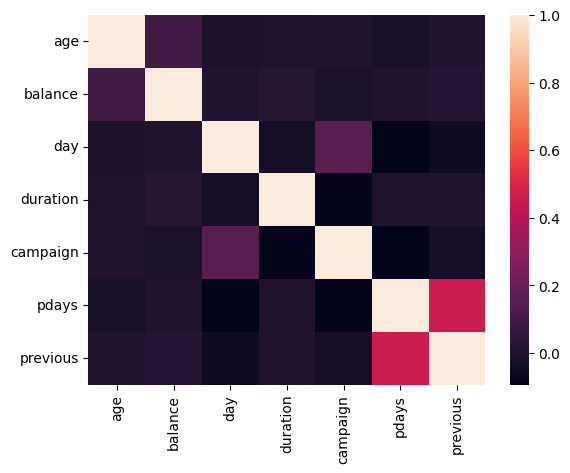

In [16]:
sns.heatmap(df.corr())

#### As per the pairplot, correlation matrix, and heatmap, observations as follow:
* Data is non-linear, asymmetric
* Hence selection of features will not depend upon correlation factor.
* Also not a single feature is correlated completely with class, hence requires combinantion of features.

## Feature Selection techniques:
1. Univariate Selection (non-negative features)
2. Recursive Feature Elimination (RFE)
3. Principal Component Analysis (PCA) (data reduction technique)
4. Feature Importance (decision trees)

#### Which feature selection technique should be used for our data?
* Contains negative values, hence Univariate Selection technique cannot be used.
* PCA is data reduction technique. Aim is to select best possible feature and not reduction and this is classification type of data.
* PCA is an unsupervised method, used for dimensionality reduction.
* Hence Decision tree technique and RFE can be used for feature selection.
* Best possible technique will be which gives extracts columns who provide better accuracy.

**Encoding Categorical and numerical data into digits form.**

Converting object type data into One-Hot Encoded data using get_dummies method.

In [ ]:
data.dtypes

In [72]:
data_new = pd.get_dummies(data, columns=['job','marital','marital_status',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'],dtype = int)


In [73]:
#Class column into binary format
data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [74]:
#Successfully converted data into  integer data types
data_new.dtypes

age                         int64
balance                     int64
day                         int64
day_month                  object
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
y                           int64
job_admin.                  int64
job_blue-collar             int64
job_entrepreneur            int64
job_housemaid               int64
job_management              int64
job_retired                 int64
job_self-employed           int64
job_services                int64
job_student                 int64
job_technician              int64
job_unemployed              int64
job_unknown                 int64
marital_divorced            int64
marital_married             int64
marital_single              int64
marital_status_divorced     int64
marital_status_married      int64
marital_status_single       int64
education_primary           int64
education_secondary         int64
education_tert

**Exploring features: Age as a example**

In [75]:
#Whole dataset's shape (ie (rows, cols))
print(data.shape)

(45216, 19)


In [76]:
#Unique education values
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary', nan], dtype=object)

In [77]:
#Crosstab to display education stats with respect to y ie class variable
pd.crosstab(index=data["education"], columns=data["y"])

y,no,yes
education,,
primary,6259,592
secondary,20752,2452
tertiary,11304,1997
unknown,1605,252


<Axes: ylabel='education'>

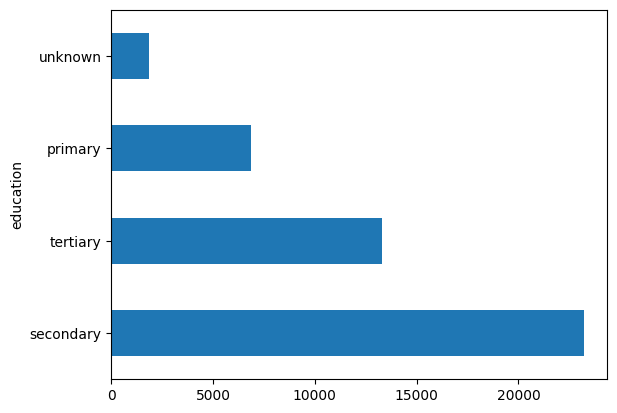

In [78]:
#Education categories and there frequency
data.education.value_counts().plot(kind="barh")

### Classifiers : Based on the values of different parameters we can conclude to the following classifiers for Binary Classification.

    1. Gradient Boosting
    2. AdaBoosting
    3. Logistics Regression
    4. Random Forest Classifier
    5. Linear Discriminant Analysis
    6. K Nearest Neighbour
    7. Decision Tree
    8. Gaussian Naive Bayes
    9. Support Vector Classifier

#### And performance metric using precision and recall calculation along with roc_auc_score & accuracy_score

In [79]:
from xgboost import XGBClassifier
classifiers = {
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(),
               }

In [80]:
#Due to one hot encoding increase in the number of columns
data_new.shape

(45216, 56)

In [88]:
data_y = pd.DataFrame(data_new['y'])
data_X = data_new.drop(['y'], axis=1)
data_X = data_X.drop(['day_month'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
Index(

In [89]:
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

In [90]:
# import warnings
# warnings.filterwarnings('ignore')
# rs = StratifiedShuffleSplit(n_splits=2, test_size=0.3,random_state=2)
# rs.get_n_splits(data_X,data_y)
# for Name,classify in classifiers.items():
#     for train_index, test_index in rs.split(data_X,data_y):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
#         y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
#         # Scaling of Features
# #         from sklearn.preprocessing import StandardScaler
# #         sc_X = StandardScaler()
# #         X = sc_X.fit_transform(X)
# #         X_test = sc_X.transform(X_test)
#         cls = classify
#         cls =cls.fit(X,y)
#         y_out = cls.predict(X_test)
#         accuracy = m.accuracy_score(y_test,y_out)
#         precision = m.precision_score(y_test,y_out,average='macro')
#         recall = m.recall_score(y_test,y_out,average='macro')
#         #roc_auc = roc_auc_score(y_out,y_test)
#         f1_score = m.f1_score(y_test,y_out,average='macro')
#         log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
#         #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
#         log = log.append(log_entry)
#         #metric = metric.append(metric_entry)

# print(log)
# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')
# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")
# plt.show()

# #Scroll complete output to view all the accuracy scores and bar graph.

As we can see highest accuracy for Logistic Regression.

### Why logistic regression?

The models are equivalent in terms of the functions they can express, so with infinite training data and a function where the input variables don't interact with each other in any way they will both probably asymptotically approach the underlying joint probability distribution. This would definitely not be true if your features were not all binary.

Gradient boosted stumps adds extra machinery that sounds like it is irrelevant to your task. Logistic regression will efficiently compute a maximum likelihood estimate assuming that all the inputs are independent. I would go with logistic regression.


**For independent Execution of Logistic Regression, Code as follows:**

In [91]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(31651, 54)
(13565, 54)
(31651, 1)
(13565, 1)


In [92]:
#Create an Logistic classifier and train it on 70% of the data set.
from sklearn import svm
from xgboost import XGBClassifier
clf = LogisticRegression()
clf

LogisticRegression()

In [93]:
#Fiting into model
clf.fit(X_train, y_train)

LogisticRegression()

In [94]:
#Prediction using test data
y_pred = clf.predict(X_test)

In [95]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8914117213416882


In [96]:
#Predictions
predictions = clf.predict(X_test)

In [97]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print(confusion_matrix(y_test, predictions))

# New line
print('\n')

# Classification report
print(classification_report(y_test,predictions))

[[11729   248]
 [ 1225   363]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.59      0.23      0.33      1588

    accuracy                           0.89     13565
   macro avg       0.75      0.60      0.64     13565
weighted avg       0.87      0.89      0.87     13565



## Conclusion:
### Used the following:
* Feature Selection - RFE-LogisticRegression
* Fiting - SVM
* With 0.8938 Accuracy (0.3% Test data)****